<h1 style="color: #00BFFF;">00 |</h1>

In [48]:
# 📚 Basic libraries
import pandas as pd # data manipulation
import numpy as np # numerical operations
import os # file managment
import warnings # warnings managment
import matplotlib.pyplot as plt # 2D visualizations
import seaborn as sns # high-resolution visualization

# 🤖 Machine Learning
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # train/test sets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import spearmanr # spearman correlation 

In [2]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [3]:
# 🎯 Specific functions
def explore_data(data): # sum & returns duplicates, NaN & empty spaces
    duplicate_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    import pandas as pd
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {data.duplicated().sum()} duplicate rows. Also;")
    return exploration

def outlier_slayer(data): # automatically removes outliers based on Q1, Q3
    for column in data.select_dtypes(include=[np.number]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

<h1 style="color: #00BFFF;">05 | Improving the Model</h1>

<h2 style="color: #008080;">Data Extraction</h2>

In [4]:
file_path = os.path.join("C:/Users/apisi/01. IronData/01. GitHub/03. Projects/05_patern_pending/00_data", "cleaned.csv")
cleaned = pd.read_csv(file_path, index_col=0) # to deal with an error `Unnamed: 0` column

In [30]:
# We will re-use this code for 05_impriving_the_model, to slowly fine-tunning the model
house_pearson = cleaned[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'price']]

house_spearman = cleaned[['condition', 'grade', 'price']]

<h3 style="color: #00BFFF;">#02 Model: "Patent-pending 02"</h3>

* For this first attempt to improve the model, we will just simply remove the obvious outliers.

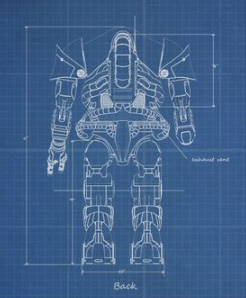

<h2 style="color: #008080;">Dealing with Outliers</h2>

In [31]:
# We will check all features, except for month encoded
house_features = cleaned[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price']]

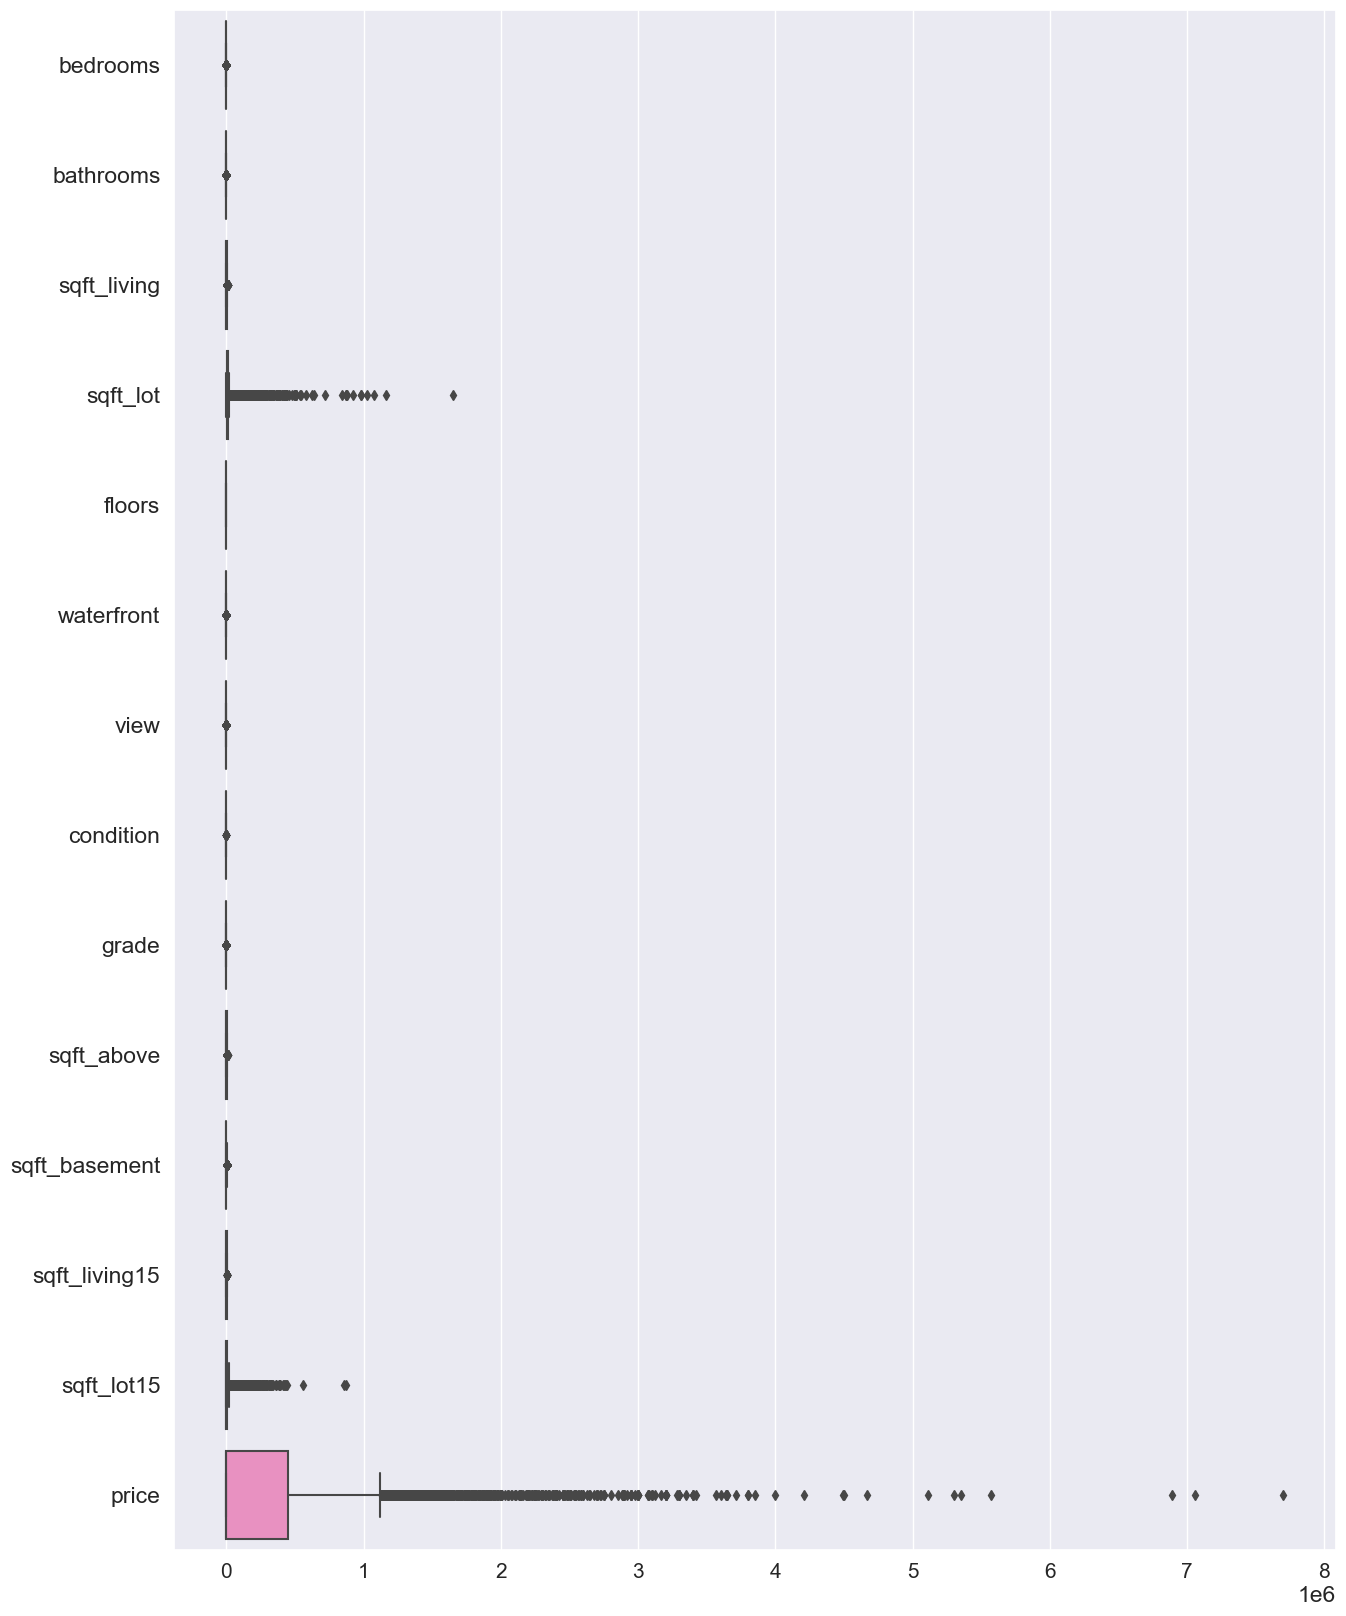

In [32]:
# For house_features variable used while checking Data distributions
fig, ax = plt.subplots(figsize=(15, 20))
sns.boxplot(data=house_features, orient="h", ax=ax, showfliers=True, whis=1.5)
ax.tick_params(axis='x', labelsize=15) # Adjust the font size of the x-axis ticks
# Show the plot
plt.show()

In [33]:
house_features = outlier_slayer(house_features)

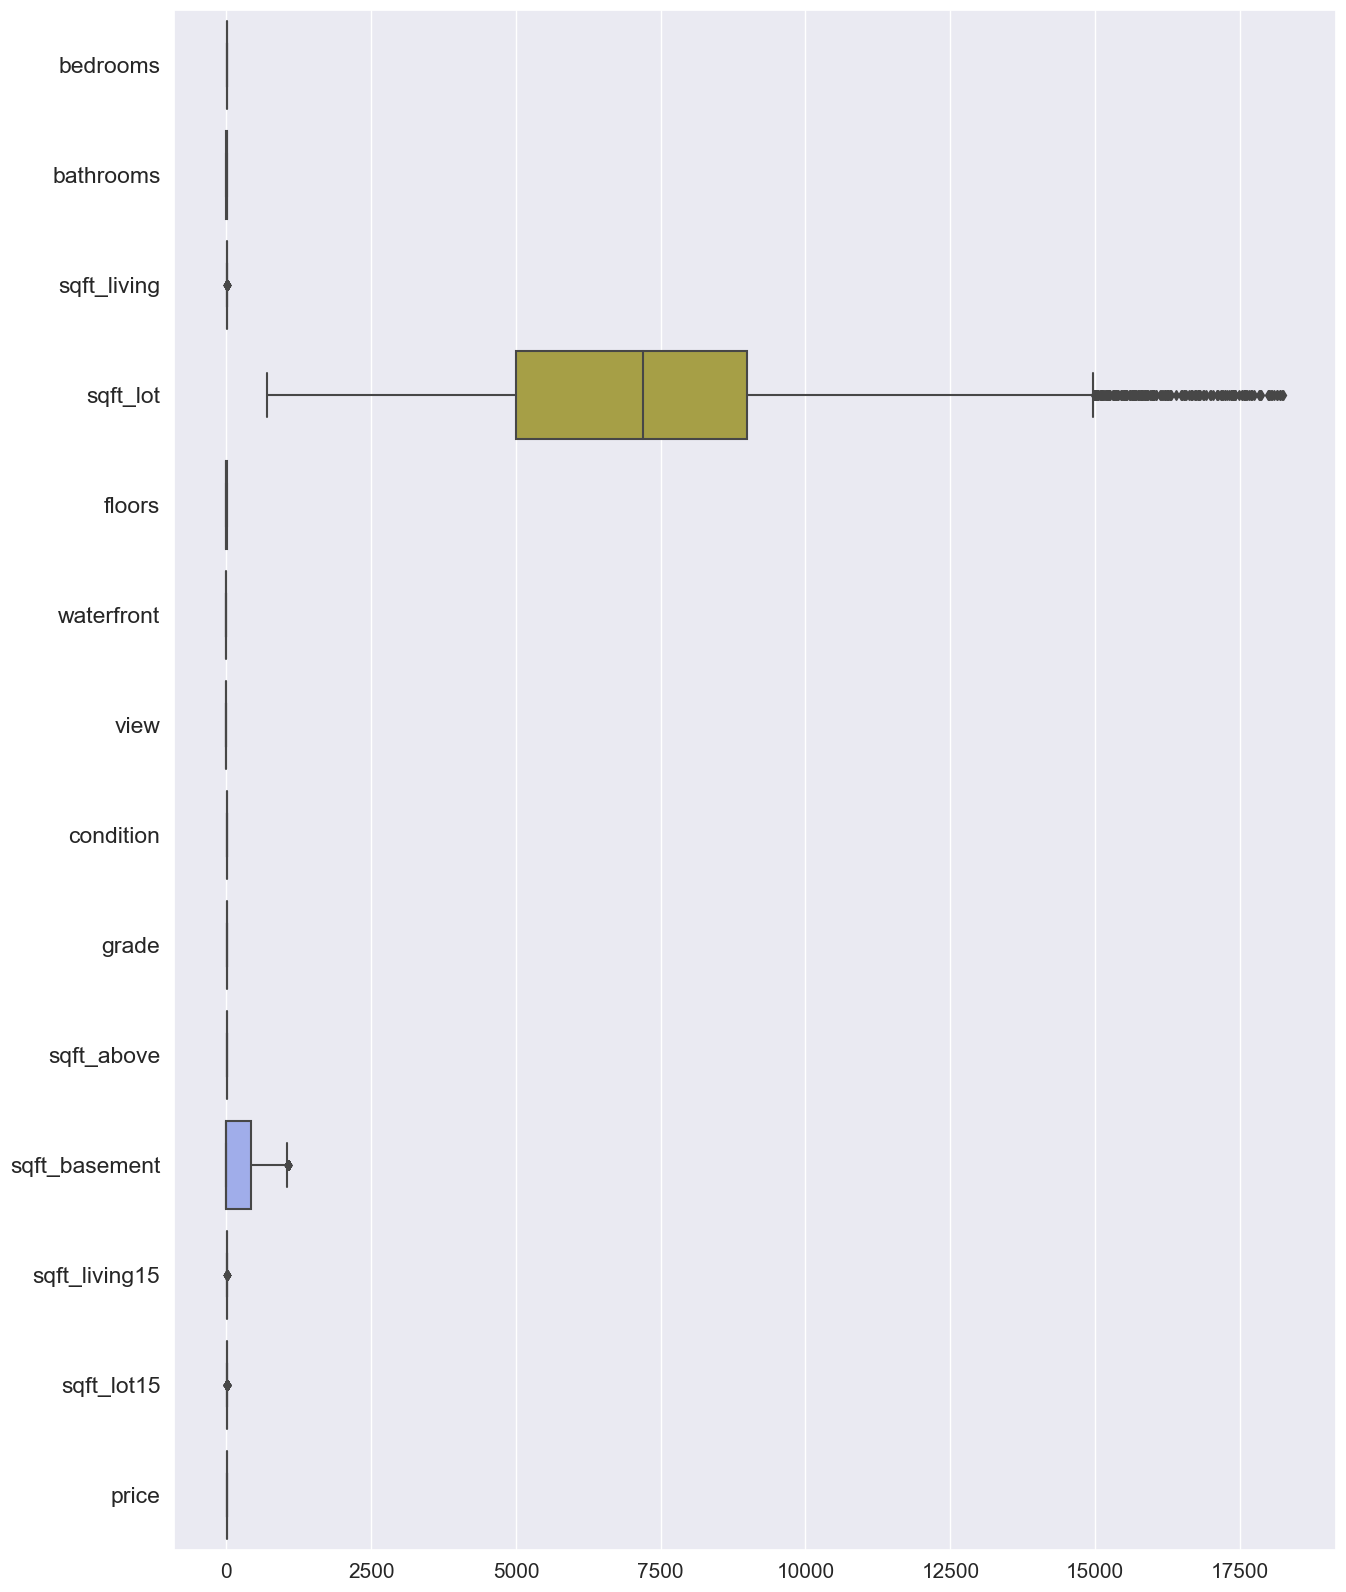

In [34]:
fig, ax = plt.subplots(figsize=(15, 20))
sns.boxplot(data=house_features, orient="h", ax=ax, showfliers=True, whis=1.5)
ax.tick_params(axis='x', labelsize=15) # Adjust the font size of the x-axis ticks
# Show the plot
plt.show()

In [35]:
# Now we are able to predict higher property value - $650K.

<h2 style="color: #008080;">Updating the df</h2>

In [36]:
cleaned.update(house_features)

<h2 style="color: #008080;">Improving it's an iteration process...</h2>

In [37]:
df2 = cleaned

In [38]:
# Split the data into input and target variables
X = df2.drop("price", axis=1)
y = df2["price"]

# Normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

# Model fit
model = LinearRegression() # We pick our model
model.fit(X_train,y_train) # We fit the training data into the model

# Train data for the model
model.fit(X_train,y_train) # We fit the training data into the model

# Predictions
predictions = model.predict(X_test)

r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("The value of the metric MSE is ", round(MSE_3, 4))
print("MAE = ", round(MAE_3, 4))

R2 =  0.8236
RMSE =  194513.2755
The value of the metric MSE is  37835414345.8763
MAE =  100386.8056


<blockquote style="background-color: #ffeeba; color: #856404; border-color: #ffeeba; padding: 10px; border-radius: 5px;">
    
* Removing outliers was an important step, but it did not significally improved our model. 
* Instead, it's slightly worst if we compare it from before:
    
</blockquote>
    
<table border="1">
  <thead>
    <tr>
      <th></th>
      <th>First Model</th>
      <th>Patent-Pending 02</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>R2</td>
      <td>0.6326</td>
      <td>0.6323</td>
    </tr>
    <tr>
      <td>RMSE</td>
      <td>218841.0967</td>
      <td>218923.5864</td>
    </tr>
    <tr>
      <td>MSE</td>
      <td>47891425625.3193</td>
      <td>47927536689.4592</td>
    </tr>
    <tr>
      <td>MAE</td>
      <td>141684.4693</td>
      <td>141766.2985</td>
    </tr>
  </tbody>
</table>

<h3 style="color: #00BFFF;">#03 Model: "Patent-pending 03"</h3>

* Outliers ✅
* Now, we will apply log transform to our skewed data.

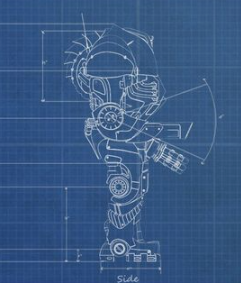

<h2 style="color: #008080;">Dealing with Data distributions I: log transform</h2>

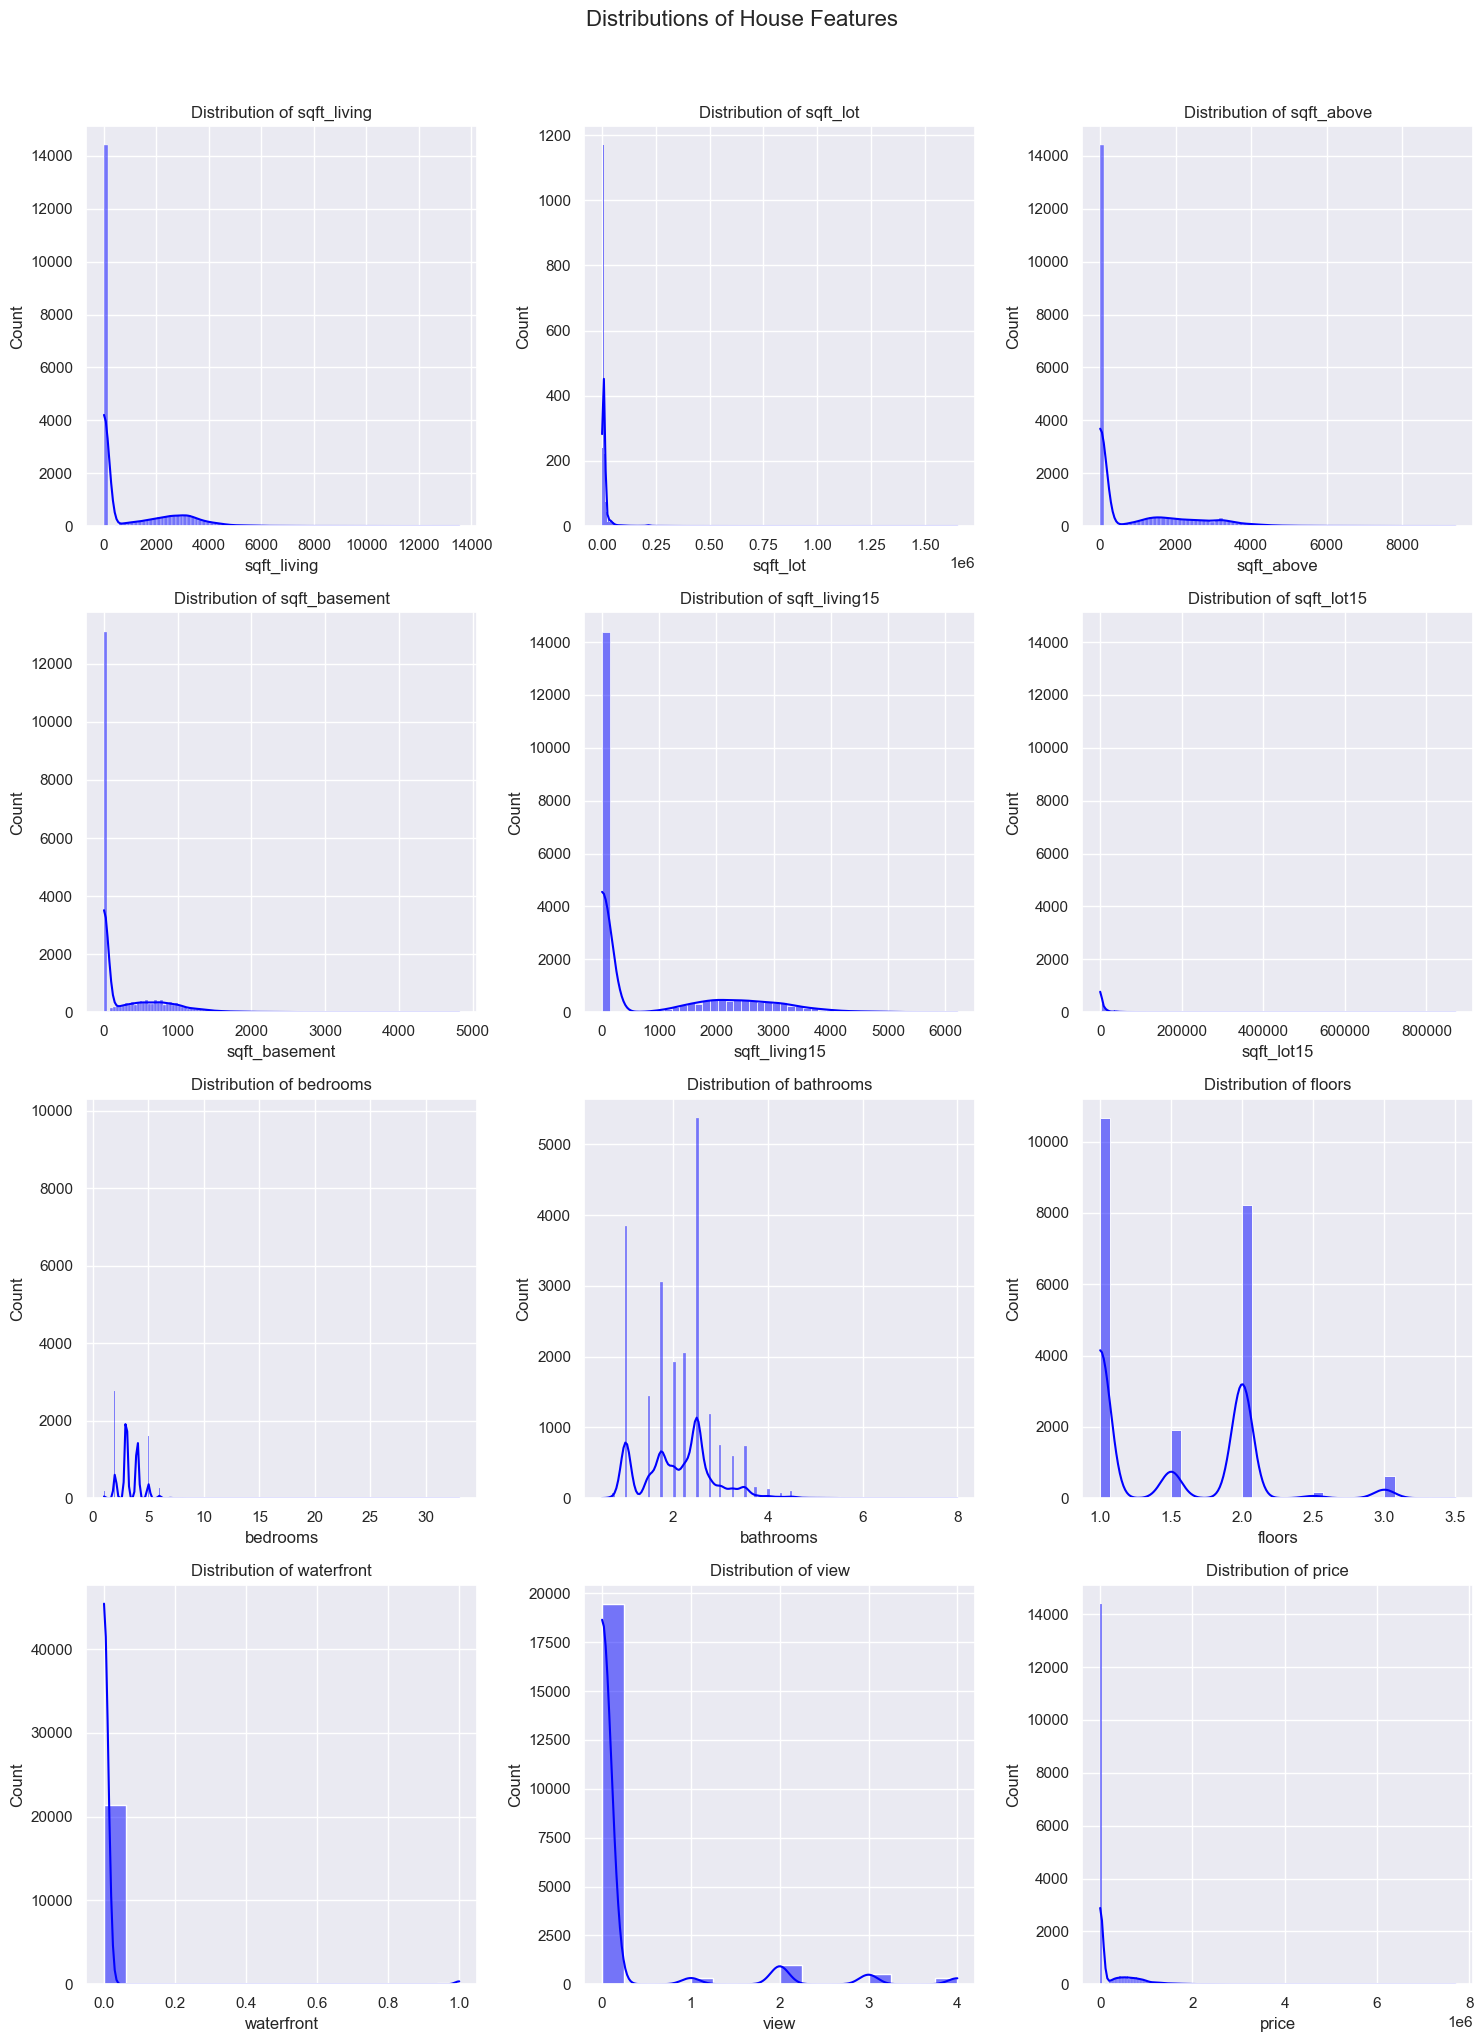

In [39]:
# Dark background
sns.set(style="darkgrid")

# Number of rows and columns for the grid
n_features = len(house_pearson.columns)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

# Grid of histograms
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
axes = axes.flatten()

for i, column in enumerate(house_pearson.columns):
    sns.histplot(data=house_pearson, x=column, kde=True, color="blue", ax=axes[i])
    axes[i].set_title(f"Distribution of {column}")

# Removing empty subplots
for i in range(len(house_pearson.columns), n_rows * n_cols):
    fig.delaxes(axes[i])

fig.suptitle("Distributions of House Features", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [40]:
# After removing outliers, data looks more normal distributed if we compared it to the 03_eda script
# We will first apply log transformations to `sqft_living`, `sqft_above`, `sqft_living15`, `sqft_lot15` and `price`

In [41]:
log_features = ['sqft_living', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'price']
for column in log_features:
    house_features[column] = np.log(house_features[column])

<h2 style="color: #008080;">Updating the df</h2>

In [42]:
cleaned.update(house_features)

<h2 style="color: #008080;">Improving it's an iteration process...</h2>

In [43]:
df3 = cleaned

In [44]:
# Split the data into input and target variables
X = df3.drop("price", axis=1)
y = df3["price"]

# Normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

# Model fit
model = LinearRegression() # We pick our model
model.fit(X_train,y_train) # We fit the training data into the model

# Train data for the model
model.fit(X_train,y_train) # We fit the training data into the model

# Predictions
predictions = model.predict(X_test)

r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("The value of the metric MSE is ", round(MSE_3, 4))
print("MAE = ", round(MAE_3, 4))

R2 =  0.8236
RMSE =  194516.2094
The value of the metric MSE is  37836555720.1114
MAE =  100391.1204


<blockquote style="background-color: #ffeeba; color: #856404; border-color: #ffeeba; padding: 10px; border-radius: 5px;">
    
* So, after applying log transform to some bell-shape distributions highly improved our model.
* `Patern-Pending 03` model seems to be better... can we improve it even further?
    
</blockquote>
    
<table border="1">
  <thead>
    <tr>
      <th></th>
      <th>First Model</th>
      <th>Patent-Pending 02</th>
      <th>Patent-Pending 03</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>R2</td>
      <td>0.6326</td>
      <td>0.6323</td>
      <td>0.8237</td>
    </tr>
    <tr>
      <td>RMSE</td>
      <td>218841.0967</td>
      <td>218923.5864</td>
      <td>194499.5709</td>
    </tr>
    <tr>
      <td>MSE</td>
      <td>47891425625.3193</td>
      <td>47927536689.4592</td>
      <td>37830083069.5626</td>
    </tr>
    <tr>
      <td>MAE</td>
      <td>141684.4693</td>
      <td>141766.2985</td>
      <td>100364.5702</td>
    </tr>
  </tbody>
</table>

<h3 style="color: #00BFFF;">#04 Model: "Patent-pending 04"</h3>

* Outliers ✅
* Log transform ✅
* Now we will check all correlation matrixes.

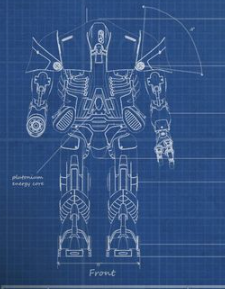

<h2 style="color: #008080;">Checking Multicollinearity</h2>

In [45]:
# Creating the Pearson matrix
house_matrix = round(house_pearson.corr(), 4)

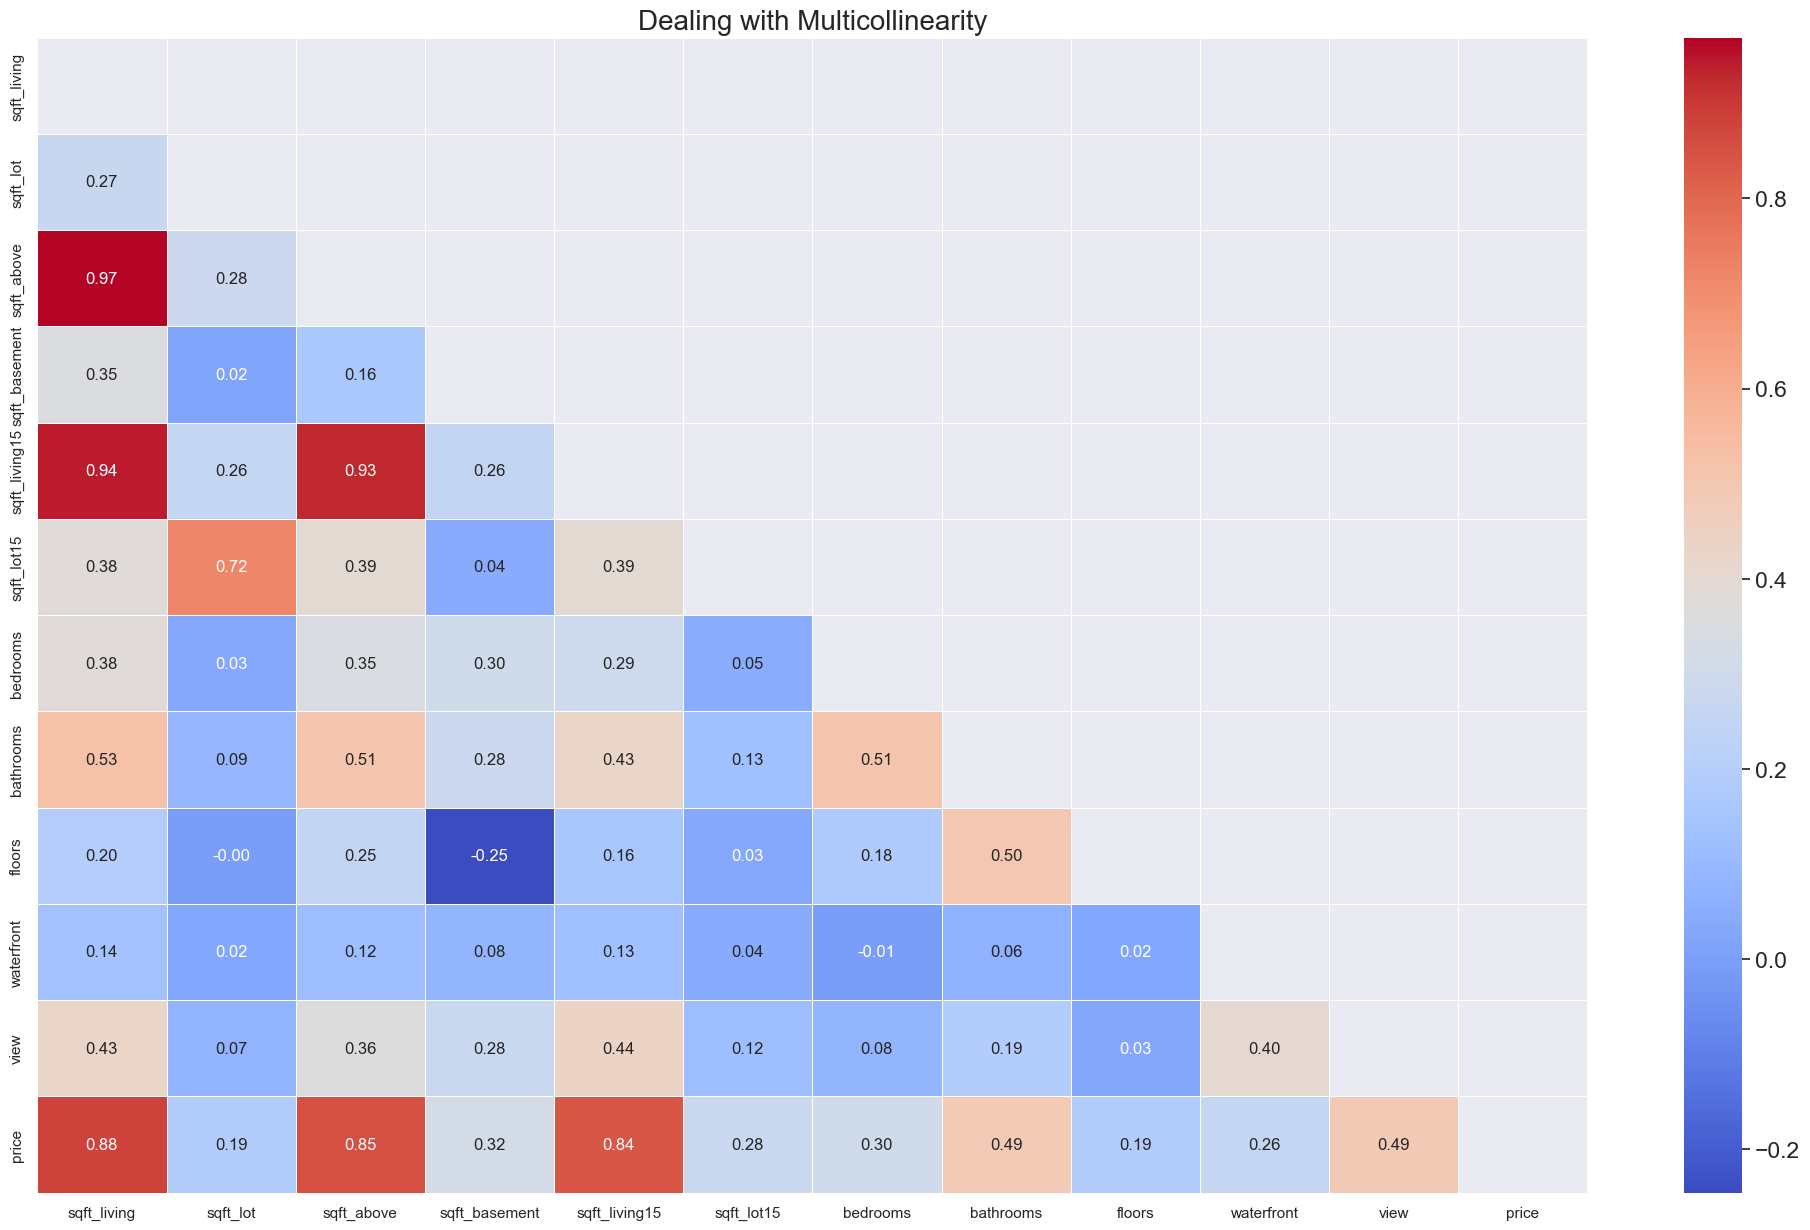

In [46]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(house_matrix)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size
ax = sns.heatmap(house_matrix, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [58]:
# Nothing to do here

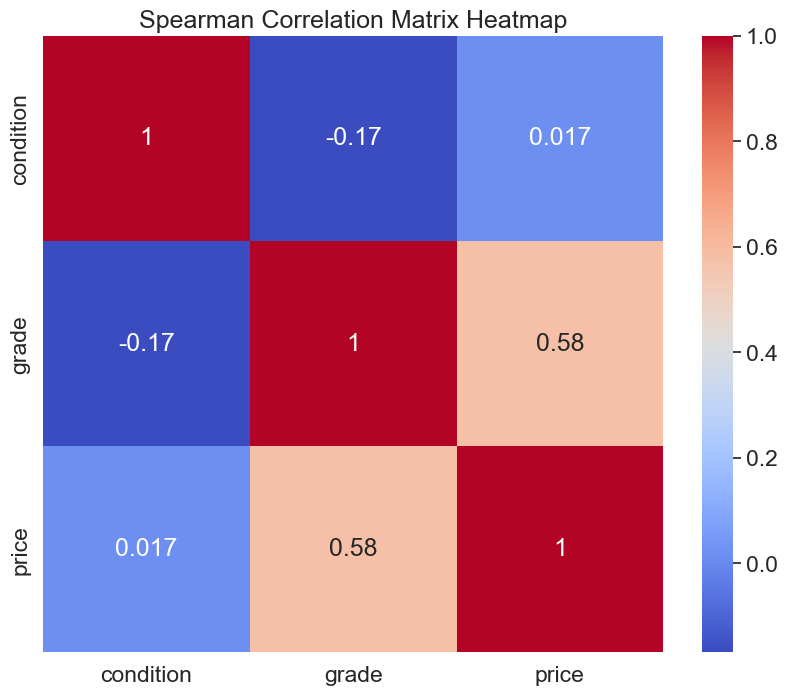

In [57]:
# Creating the Pearson matrix
correlation_matrix, _ = spearmanr(house_spearman)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=house_spearman.columns, yticklabels=house_spearman.columns)
plt.title('Spearman Correlation Matrix Heatmap')
plt.show()

In [59]:
# The darker the color, the stronger the correlation.
# Nothing to do here,

<h2 style="color: #008080;">Updating the df</h2>

<h2 style="color: #008080;">Updating the df</h2>

In [ ]:
cleaned.update(house_features)

<h2 style="color: #008080;">Improving it's an iteration process...</h2>

In [ ]:
df4 = cleaned

In [ ]:
# Split the data into input and target variables
X = df4.drop("price", axis=1)
y = df4["price"]

# Normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

# Model fit
model = LinearRegression() # We pick our model
model.fit(X_train,y_train) # We fit the training data into the model

# Train data for the model
model.fit(X_train,y_train) # We fit the training data into the model

# Predictions
predictions = model.predict(X_test)

r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("The value of the metric MSE is ", round(MSE_3, 4))
print("MAE = ", round(MAE_3, 4))

<blockquote style="background-color: #ffeeba; color: #856404; border-color: #ffeeba; padding: 10px; border-radius: 5px;">
    
* 
    
</blockquote>
    
<table border="1">
  <thead>
    <tr>
      <th></th>
      <th>First Model</th>
      <th>Patent-Pending 02</th>
      <th>Patent-Pending 03</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>R2</td>
      <td>0.6326</td>
      <td>0.6323</td>
      <td>0.8237</td>
    </tr>
    <tr>
      <td>RMSE</td>
      <td>218841.0967</td>
      <td>218923.5864</td>
      <td>194499.5709</td>
    </tr>
    <tr>
      <td>MSE</td>
      <td>47891425625.3193</td>
      <td>47927536689.4592</td>
      <td>37830083069.5626</td>
    </tr>
    <tr>
      <td>MAE</td>
      <td>141684.4693</td>
      <td>141766.2985</td>
      <td>100364.5702</td>
    </tr>
  </tbody>
</table>